# Titanic Survival Prediction

## Overview
Predict survival of passengers on the Titanic using machine learning.

This project uses machine learning to predict survival on the Titanic dataset.
We explore four models:
- Logistic Regression
- Decision Tree
- Random Forest
- K-Nearest Neighbors (KNN)

The goal is to compare their performance and understand which model best predicts survival.
## Dataset
- Source: Kaggle Titanic dataset (train.csv)
- Total records: 891 passengers
- Features used:
    - Pclass: Passenger class (1, 2, 3)
    - Sex: Male or Female
    - Age: Age in years
    - SibSp: Number of siblings/spouses aboard
    - Parch: Number of parents/children aboard
    - Fare: Ticket fare
    - Embarked: Port of embarkation (C, Q, S)
- Target:
    - Survived (0 = did not survive, 1 = survived)

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



In [1]:
!pip install -q kaggle
from google.colab import files #Upload kaggle API key (kaggle.json)
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle competitions download -c titanic
!unzip -o titanic.zip -d titanic_data

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 128MB/s]
Archive:  titanic.zip
  inflating: titanic_data/gender_submission.csv  
  inflating: titanic_data/test.csv   
  inflating: titanic_data/train.csv  


In [7]:
df = pd.read_csv("titanic_data/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
print("Shape of data:", df.shape)

Shape of data: (891, 12)


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [ ]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
print(df.describe())

       PassengerId    Survived      Pclass  ...       SibSp       Parch        Fare
count   891.000000  891.000000  891.000000  ...  891.000000  891.000000  891.000000
mean    446.000000    0.383838    2.308642  ...    0.523008    0.381594   32.204208
std     257.353842    0.486592    0.836071  ...    1.102743    0.806057   49.693429
min       1.000000    0.000000    1.000000  ...    0.000000    0.000000    0.000000
25%     223.500000    0.000000    2.000000  ...    0.000000    0.000000    7.910400
50%     446.000000    0.000000    3.000000  ...    0.000000    0.000000   14.454200
75%     668.500000    1.000000    3.000000  ...    1.000000    0.000000   31.000000
max     891.000000    1.000000    3.000000  ...    8.000000    6.000000  512.329200

[8 rows x 7 columns]


## Data Cleaning & Preprocessing

In [ ]:
# Dropped columns with too many missing values or irrelevant info

df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [ ]:
# Missing age values are commonly filled with the median

df['Age'].fillna(df['Age'].median(), inplace=True)

/tmp/ipython-input-2799726934.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [ ]:
# Fill missing embarked values with the most common port (mode)

df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

/tmp/ipython-input-3499388770.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [ ]:
# Convert categorical features to numbers (Sex and Embarked)

df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Sex_male    891 non-null    bool   
 7   Embarked_Q  891 non-null    bool   
 8   Embarked_S  891 non-null    bool   
dtypes: bool(3), float64(2), int64(4)
memory usage: 44.5 KB


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [ ]:
df['Sex_male'] = df['Sex_male'].astype(int)
df['Embarked_Q'] = df['Embarked_Q'].astype(int)
df['Embarked_S'] = df['Embarked_S'].astype(int)

df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


## Train/Test Split
- Split data into features (X) and target (y)
- Training set: 80% of data
- Test set: 20% of data
- Random state set to 42 for reproducibility

In [ ]:
X = df.drop("Survived", axis=1)
y = df["Survived"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Logistic Regression
- Baseline model for binary classification
- Predicts survival probability and converts to 0/1 using a threshold of 0.5
- Simple and interpretable
- Accuracy and confusion matrix are used to evaluate performance

In [ ]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = log_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)

Logistic Regression Accuracy: 0.8100558659217877


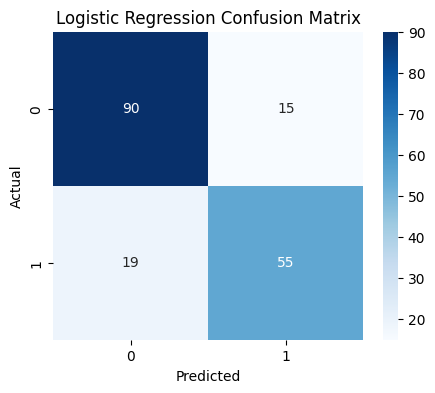

In [ ]:
# Confusion Matrix shows incorrect and correct classification:
#Top-left = True negative (predicted dead, actually dead)
#Top-right = False positive (predicted survived, actually dead)
#Bottom-left = False negative (predicted dead, actually survived)
#Bottom-right = True positive (predicted survived, actually survived)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

## Model Comparison
- Bar chart compares accuracy of all four models
- Random Forest slightly outperformed Logistic Regression
- Logistic Regression performs well because dominant features (Sex, Pclass) are strongly predictive

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)

Decision Tree Accuracy: 0.7821229050279329


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

Random Forest Accuracy: 0.8212290502793296


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn)

KNN Accuracy: 0.6983240223463687


/tmp/ipython-input-4270110353.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette="viridis")


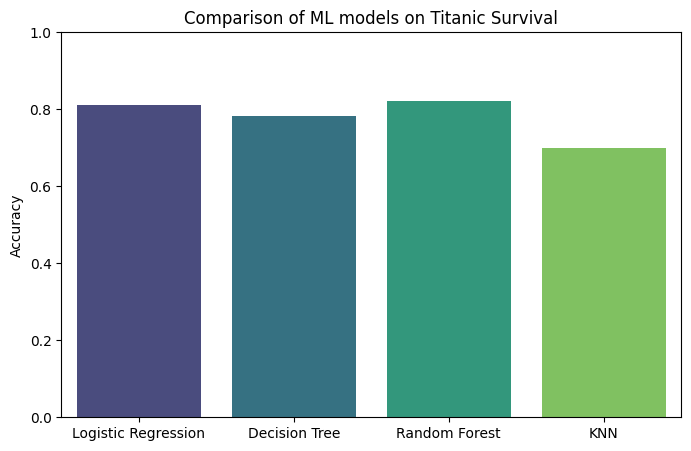

In [ ]:
models = ["Logistic Regression", "Decision Tree", "Random Forest", "KNN"]
accuracies = [accuracy, accuracy_dt, accuracy_rf, accuracy_knn]

plt.figure(figsize=(8,5))
sns.barplot(x=models, y=accuracies, palette="viridis")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.title("Comparison of ML models on Titanic Survival")
plt.show()

      Feature  Importance
5    Sex_male    0.273316
4        Fare    0.272058
1         Age    0.252745
0      Pclass    0.078616
2       SibSp    0.052192
3       Parch    0.038490
7  Embarked_S    0.023095
6  Embarked_Q    0.009488


/tmp/ipython-input-3408952418.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_importance, palette="viridis")


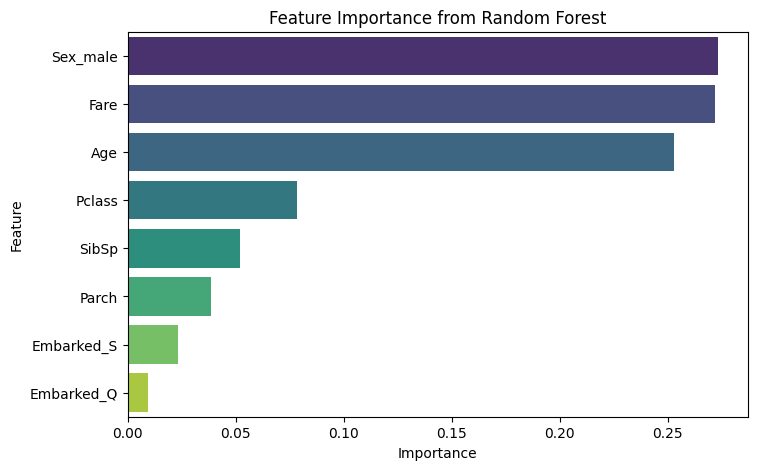

In [ ]:
# Feature importance with Random Forest

importances = rf_model.feature_importances_
features = X.columns

feat_importance = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_importance = feat_importance.sort_values(by='Importance', ascending=False)

print(feat_importance)

plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feat_importance, palette="viridis")
plt.title("Feature Importance from Random Forest")
plt.show()

## Conclusion
- Logistic Regression is a strong baseline
- Random Forest captures interactions and slightly improves accuracy
- Feature importance analysis shows Sex, Fare and Age are dominant predictors